<center>
    <h1><font color=darkred> Tsinghua University </font></h1>
    <h1><font color=darkred> Department of Industrial Engineering </font></h1>
    <h3> Machine Learning and Big-data (30160253) </h3>
    <h4> Fall 2025 </h4>
    <hr>
    <h1> Lab 3: Logistic Regression & K-nearest Neighbors</h1>
    <h3></h3>
</center>

## <center> Case 2: Classification of the heart disease type

## Coding section (Preview)

<font face="Times New Roman">The heart disease type of the patients can be roughly classified according to their age and cholesterol.</font>

病人的心脏病类型（A型和B型）可以根据他们的年龄（岁）和胆固醇水平（mmol/L）进行初步分类。

### 1.1 Data processing

In [24]:
# Load Python packages
import pandas as pd  # pip install pandas
from matplotlib import pyplot as plt  # pip install matplotlib
from sklearn.model_selection import train_test_split

In [25]:
# Load raw data
data = pd.read_csv('HeartDisease_data.csv')  # Returns a pandas DataFrame object

In [26]:
# Display part of raw data
data.head(10)
#print(data.head(10))  # Display the first 10 rows of DataFrame

,Age,Cholesterol,HeartDiseaseType
0,55,177.5,1
1,49,207.4,0
2,56,209.7,0
3,65,195.9,0
4,48,215.2,0
5,48,232.1,0
6,66,276.6,1
7,58,225.2,0
8,45,227.7,0
9,55,217.8,0


Text(0, 0.5, 'Cholesterol (mg/dL)')

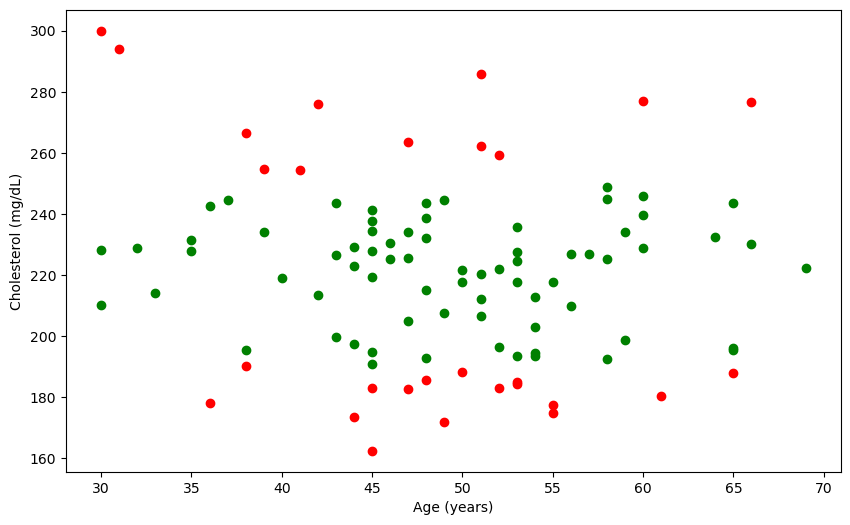

In [27]:
# Visualize the distribution on X1 of raw data
plt.figure(figsize=(10, 6))
# 类型 A 的患者
plt.scatter(data[data['HeartDiseaseType'] == 0]['Age'], data[data['HeartDiseaseType'] == 0]['Cholesterol'],
            color='green', label='Type A')

# 类型 B 的患者
plt.scatter(data[data['HeartDiseaseType'] == 1]['Age'], data[data['HeartDiseaseType'] == 1]['Cholesterol'],
            color='red', label='Type B')
plt.xlabel('Age (years)')
plt.ylabel('Cholesterol (mg/dL)')
# plt.show()

绿色的点表示A类型心脏病的患者，红色的点表示B类型心脏病的患者。

注意：由于心脏病的类型可能与年龄和胆固醇水平存在非线性关系，因此使用 KNN 模型是合适的。

In [28]:
# obtain training and testing datasets
X = data[['Age', 'Cholesterol']]
Y = data['HeartDiseaseType']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)

### 1.2 Model training and prediction

In [29]:
# Build a K-nearest Neighbors model and fit the data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  # Create a KNN model with 3 neighbors
knn.fit(X_train.values, y_train.values)  # Fit the model using the training data

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
# Prediction
y_pred = knn.predict(X_test.values)  # Predict the labels of testing data

### 1.3 Performance metrics

In [31]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'K={5}, 准确率={acc:.4f}')

K=5, 准确率=0.9500


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report: ")
print(classification_report(y_test, y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.86      0.92         7

    accuracy                           0.95        20
   macro avg       0.96      0.93      0.94        20
weighted avg       0.95      0.95      0.95        20



precision：精确率，表示预测为正例的样本中真正为正例的比例。精确率越高，说明模型预测为正例的样本中，真正为正例的样本越多。

recall：召回率，表示真正为正例的样本中被预测为正例的比例。召回率越高，说明模型找出了越多的真正正例。

f1-score：F1分数，是精确率和召回率的调和平均数。F1分数越高，说明模型在精确率和召回率之间取得了更好的平衡。

support：支持数，即该类别的样本数。

## 3 Visualizing results

### 3.1 Confusion Matrix

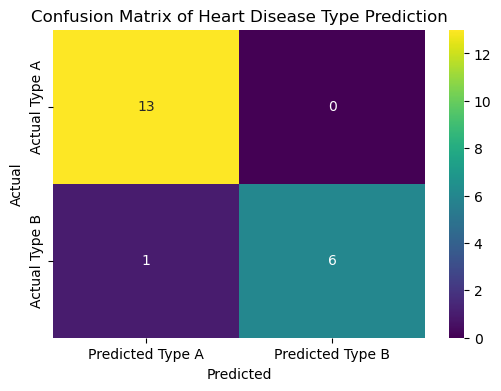

In [33]:
import seaborn as sns

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 创建一个 DataFrame，用于绘制热力图
cm_df = pd.DataFrame(cm, index=['Actual Type A', 'Actual Type B'],
                     columns=['Predicted Type A', 'Predicted Type B'])

# 绘制混淆矩阵的热力图
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix of Heart Disease Type Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 3.2 Decision boundary

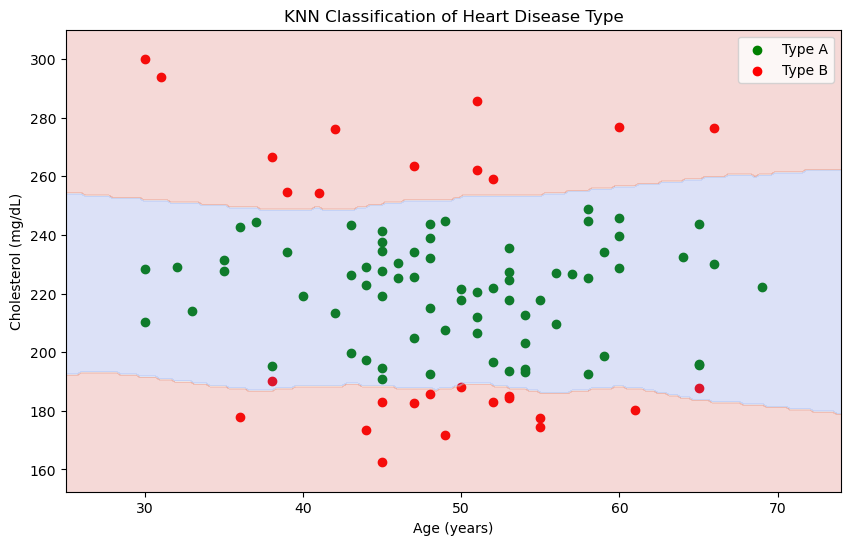

In [34]:
import numpy as np
plt.figure(figsize=(10, 6))
plt.scatter(data[data['HeartDiseaseType'] == 0]['Age'], data[data['HeartDiseaseType'] == 0]['Cholesterol'],
            color='green', label='Type A')
plt.scatter(data[data['HeartDiseaseType'] == 1]['Age'], data[data['HeartDiseaseType'] == 1]['Cholesterol'],
            color='red', label='Type B')
age_min, age_max = data['Age'].min() - 5, data['Age'].max() + 5
chol_min, chol_max = data['Cholesterol'].min() - 10, data['Cholesterol'].max() + 10
xx, yy = np.meshgrid(np.linspace(age_min, age_max, 200),
                     np.linspace(chol_min, chol_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.xlabel('Age (years)')
plt.ylabel('Cholesterol (mg/dL)')
plt.title('KNN Classification of Heart Disease Type')
plt.legend()
plt.show()

散点图：类型 A 和类型 B 的患者在年龄和胆固醇水平维度上形成了一个圆形的分布，展示了非线性关系。

决策边界：KNN 模型的决策边界较好地适应了数据的非线性分布，正确地划分了两类数据。

## Effect of different K values

K=1, acc=0.9500
K=2, acc=0.9500
K=3, acc=0.9500
K=4, acc=0.9000
K=5, acc=0.9000
K=6, acc=0.9000
K=7, acc=0.9000
K=8, acc=0.9000
K=9, acc=0.9000
K=10, acc=0.8500
K=11, acc=0.9000
K=12, acc=0.8500
K=13, acc=0.9000
K=14, acc=0.9000
K=15, acc=0.9000
K=16, acc=0.9000
K=17, acc=0.9000
K=18, acc=0.8500
K=19, acc=0.8500
K=20, acc=0.7000


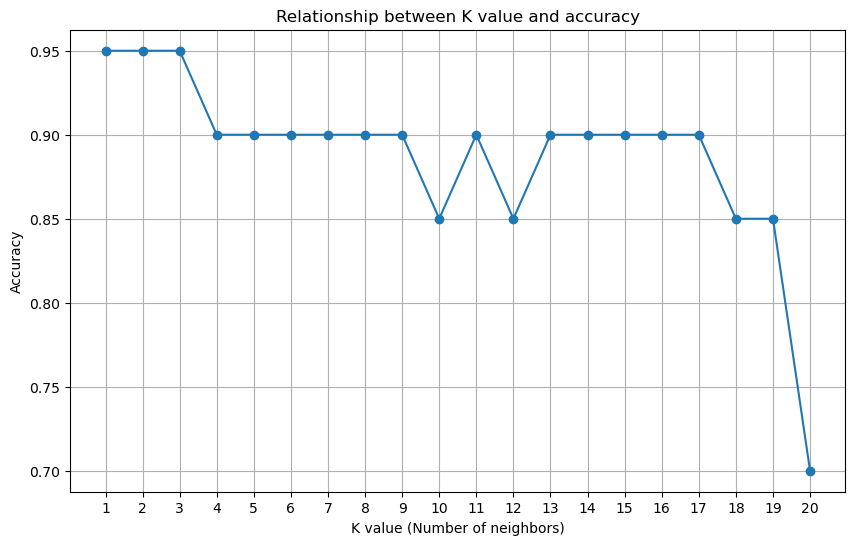

In [35]:
from sklearn.metrics import accuracy_score
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'K={k}, acc={acc:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Relationship between K value and accuracy')
plt.xlabel('K value (Number of neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()